이미지 변환 영역 처리 : 공가 주파수, 이산 푸리에, 고속, 푸리에, FFT 주파수 영역 필터링, 이산 코사인 변환
1. 주파수 : 신호처리에 해당하고 1초동안에 진동하는 회수 
            영상처리의 주파수는 화소밝기의 변화를 공간 주파수

2. 공간 주파수는 고주파, 저주파 두개로 나뉜다 (밝기변화에 따라서)
   - 고주파 : 화소밝기가 급변하는 것, 경계부분, 객체의 모서리
   - 저주파 : 사진의 배경처럼 화소밝기가 변화가 없거나 점진적으로 변화하는 것, 객체의 내부값
   
   입력영상 -> (공간 주파수처리 : 주파수변환 -> 주파수 영역관한 처리 -> 주파수 역변환) -> 출력 영상

3. 주기를 갖는 신호는 여러개의 사인, 코사인 함수들로 분리한다. -> 분리된 신호
   -> 기저함수 -> 기저함수*값(주파수 계수)
   
4. 신호를 주파수로 변환하는 것은 각 주파수의 기저함수들에 대한 계수를 찾는 것을 말한다.

5. 역변환 : 각 기저함수와 그 계수들로 부터 원본 신호를 재구성하는 것을 말한다.
========================================================================================================
<<푸리에>>
6.주파수 스펙트럼 : 푸리에 변환을 수행하면 복소수의 결과가 생성되고 영상확인 하기 위해 실수부와 허수부를
                    벡터로 간주하여 벡터의 크기를 구한다
  복소수를 abs() 절대값으로 리턴하게 되면 크기, 실수부 허수부가 2채널 행렬로 이루어 지면
  cv2.magnitude(x,y[, magnitude])함수로 구한다.
  
7. 주기를 가진 신호는 정현파/여현파의 합으로 표현할 수 있다.

8. 푸리에 변환의 계산 #계산식은 위키참고#

9. 푸리에(Fourier) : 일정한 주기를 갖는 신호는 정현파의 합으로 표현된 것을 말한다.
                     푸리에 급수의 성질을 이용해서 주파수 영역으로 변환할 수 있다.
                     어떤 주파수 성분이 얼마나 포함되었는지 분석 할 수 있다.
                     반대로 주파수 영역으로 변환되는 신호를 시간 영역으로 변환도 가능하다.
                     
           - 푸리에 급수 : 주기가 있는 임의의 함수를 삼각함수의 급수로 바꾸어 나타낸다.
           - 오일러 공식(Euler's formula) : 삼각함수와 지수함수에 대한 관계
           - 적분 : 주기가 없는 함수라도 삼각함수의 급수로 나타낸다.
           - 직교성 : 삼각함수는 직교로 함수를 내적하면 0이 나온다.

<<신호를 구성하는 세가지 요소>>
  주기 T : 반복시간, 진폭 A : 파형의 크기(0에서 양의 최대 높이까지의 거리).
  위상 : 파형의 시작이 얼마나 지연되고 선행되었는지 나타내는 시간차이
  연속 푸리에 : 연속적인 시간영역의 신호를 주파수 영역으로 변환하는 것

10. 이산 푸리에(Discrete Fourier Transform)
  - DFT 주파수 : 스펙트럼 영상은 저주파 영역이 영상의 모서리 부분(배경)에 위치하고
     고주파 부분이 중심부에 있어서 해당 주파수 영역에서 처리하기가 어렵다.
     shift 연산을 통해서 1사분면과 3사분면의 영상을 맞바꾸고, 2사분면과 4사분면의 영상을
     맞바꾸어서 해결한다.
     
  - 디지털 영상은 아날로그 신호가 아닌 디지털 데이터이기 때문에 연속푸리에 변환에 직접 적용
  
  - 푸리에 변환의 적분을 합으로 변경
  
11. 고속 푸리에(Fast Fourier Transform : FFT)
  -  이산 푸리에는 변환이 복잡하고 연산량이 많아 지기 때문에 하드웨어를 구현할 때
     처리속도가 늦어지는 단점을 보안한 푸리에
     
  - 이산푸리에 공식에서 반복계산을 제거 후 변환을 빠르게 수행
  
  - 1차원 DFT를 두번 수행하는 DFT의 분리 후 2차원 DFT를 수행 변형 후 실행
  
12. 고속 푸리에 변환의 원리 및 특징
  - 고속 푸리에의 변환은 기저 함수의 계산  과정에서 삼각함수의 주기성을 이용해
    작은 단위로 분리 한 다음 수행하고 합친다. (스크램블과 버터플라이과정)
  
  - 신호를 두개의 원소로 연속적으로 분리하기 때문에 신호의 길이를 2의 자승으로 만든다.
    영상의 크기가 2의 자승으로 확장된 영역에 0값을 지정하는 영상 삽입과정을 반드시 거치게 된다.
    
  ex) [1단계] 영상데이터가 디지털 -> 영상크기를 2의 자승으로 만든다. (N=2**j, M= 2**k)
              (단 영상의 크기가 2자승이 아닐경우 0의 값을 대입해서 강제로 2의 자승을 만든다.
      [2단계] 스크램블링
              재귀적인 DFT에 적용하는 계산 주기를 만들고 데이터를 적절히 배치한다.
      
      [3단계] 버터플라이 함수
              데이터를 점(Pointer)의 집합으로 나누어서 이웃한 점의 DFT 변환 수행
              
13. 스펙트럼(Spectrum) 영상
   - 디지털 영상이 이산 푸리에 변환으로 주파수 영역 영상으로 변환되는 것
   
   - 스펙트럼 영상에는 푸리에 변환의 컬러 대칭으로 만들어 대칭 성분을 4각형의 네구역으로 직류성분을 구성한다.
   
   - Shuffling 작업은 푸리에 변환에 주기성을 이용해서 주파수 4분 면을 영상의 가운데로 이동시키는 것
   
14. 로우패스 필터 : 저주파만 통과시킨다.
  이미지 데이터의 경우 화소값의 변화가 작은 부분이 저주파로 되어 있기 때문에
  로우패스 필터로 노이즈 제거를 할 수 있다.
  
  1단계 : 고속 푸리에 변환 이미지 데이터를 공간 영역에서 공간 주파수 영역으로 변환
  2단계 : 공간 주파수 영역의 중심에서 낮은 주파수 성분 : 제로 주파수를 만들어 중심 이동
  3단계 : 하이 패스 필터로 고주파 성분만 추출한다(공간 주파수 영역 중심의 데이터를 0으로 대체)
  4단계 : 고속 역푸리에 공간 영역을 되돌린다.
  
15. FFT주파수영역 필터링_2) 하이 패스 필터 : 고주파 통과, 이미지 윤곽, 특징점 추출

16. FFT주파수영역 필터링_3) 밴드 패스 필터 : 특정 범위의 주파수 성분만을 추출해서 필터링으로 데이터 압축등의 외형이 작은 성분 제거

17. 주파스 과정에서 필터링 과정은 변환 계수에 필터 행렬을 원소간에 곱해서 수행된다. 필터링된 푸리에 변환 계수를 역변환하면서 다시 공간 영역의 영상으로 만들 수 있다.

18. 푸리에 변환된 주파수 영역에서 필터링의 방법으로 고주파 통과 필터와 저주파 통과 필터등이 있다. 필터의 계수를 점진적으로 변화시킨 결과의 영상 화질을 개선하는 가우시안 필터링등도 있다.

19. DFT에서 실수부만 취하고 허수부분을 제외하면서 코사인 함수만으로 구성된 직교 변환 방식이다. 영상 신호의 에너지 집중 특성이 뛰어나기 때문에 영상 압축에 효과적인 방법으로 사용된다.

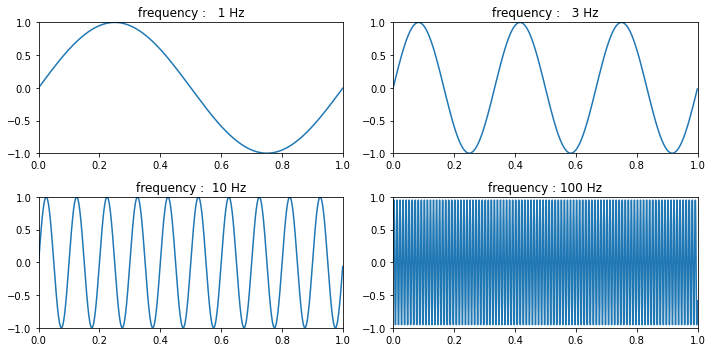

In [4]:
# ex_01)공간주파수를 만들어서 확인
import matplotlib.pyplot as plt
import numpy as np

#time vector
m_t = np.arange(0,1,0.001)

Hz = [1,3,10,100]
gs = [np.sin(2*np.pi*m_t*h) for h in Hz]

plt.figure(figsize = (10,5))
for i,g in enumerate(gs):
    plt.subplot(2,2,i+1), plt.plot(m_t,g)
    plt.xlim(0,1), plt.ylim(-1,1)
    plt.title("frequency : %3d Hz"%Hz[i])
    
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


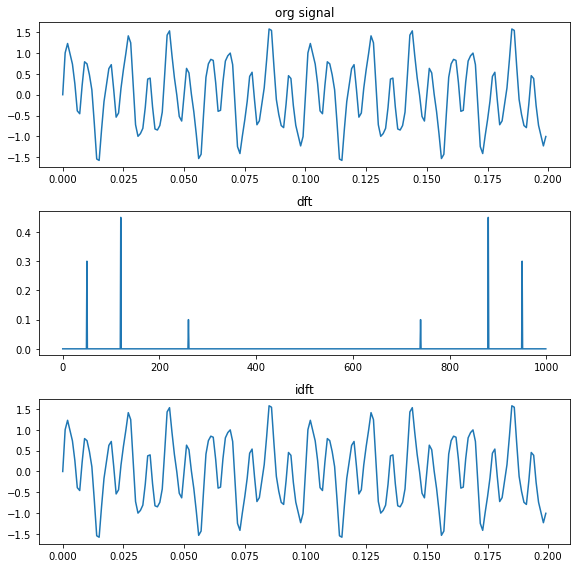

In [9]:
#ex_02)공간 주파수를 만들어서 확인
import matplotlib.pyplot as plt
import numpy as np
import math

# 복소수 클래스
def exp(knN):
    th = -2 * math.pi * knN
    return complex(math.cos(th),math.sin(th))  #복소수 클래스

#dft 클래스
def dft(g):
    N = len(g)
    dst = [sum(g[n]*exp(k*n/N) for n in range(N)) for k in range(N)]
    return np.array(dst)

#idft 클래스
def idft(g):
    N = len(g)
    dst = [sum(g[n]*exp(-k*n/N) for n in range(N)) for k in range(N)]
    return np.array(dst)/N

fmax= 1000 #샘플링 주파수 1000Hz
dt = 1/fmax
t = np.arange(0,1,dt)

g1 = np.sin(2*np.pi*50*t)
g2 = np.sin(2*np.pi*120*t)
g3 = np.sin(2*np.pi*260*t)

#신호 합성
g = g1*0.6 + g2*0.9 + g3*0.2

#신호의 길이
N = len(g)
df = fmax / N
f = np.arange(0,N,df)

#사용자 정의 DFT(이산푸리에 변환)
xf = dft(g) * dt
g2 = idft(xf)/dt

#이미지

plt.figure(figsize = (8,8))
plt.subplot(3,1,1),plt.plot(t[0:200],g[0:200]), plt.title("org signal")
plt.subplot(3,1,2),plt.plot(f,np.abs(xf)),plt.title("dft")
plt.subplot(3,1,3),plt.plot(t[0:200],g2[0:200]),plt.title("idft")
plt.tight_layout()
plt.show()


In [17]:
#ex 3.) 고속 푸리에(Fast Fourier Transform: FFT)를 구현해 보자.
#help(np.fft.fft2)
#fft2(a, s = None, axes= (-2,-1), norm = None)

import numpy as np
import cv2

#로우패스 필터 : 저주파만 통과시킨다.
#이미지 데이터의 경우 화소값의 변화가 
def my_filter(scr,a=0.5):
    #3-1 고속푸리에 변환(2차원)
    src = np.fft.fft2(scr)
    
    #3-2 이미지 크기
    h,w = src.shape
    
    #3-3 이미지 중심 좌표
    cy,cx = int(h/2), int(w/2)
    
    #3-4 필터의 크기(사각형의 높이와 폭)
    rh, rw = int(a*cy), int(a*cx)
    
    #3-5 4분면을 만들어서 교체를 해보자 np.fft.fftshift()
    fsrc = np.fft.fftshift(src)
    
    #3-6 입력 이미지와 같은 크기로 값 0의 배열로 생성
    fdst = np.zeros(src.shape,dtype = complex)
    
    #3-7 중심 부분의 값만 할당(주심 부분 이외는 0)
    fdst[cy-rh: cy+rh,cx-rw:cx+rw] = fsrc[cy-rh: cy+rh,cx-rw:cx+rw]
    
    #3-8 4분면을 만들어서 교체한것을 해제
    fdst = np.fft.fftshift(fdst)
    
    #3-9 고속 역 푸리에 변환
    dst = np.fft.ifft2(fdst)
    
    #3-10 실수부의 값만을 꺼내서 부호 없는 정수로 변환 후 리턴
    return np.uint8(dst.real)

#1. 이미지 로드
img = cv2.imread("c:\\opencv_test\\Lenna.png")

#2. 그레이 스케일로 변환
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#3. 로우패스 필터링(사용자 함수)
res_img = my_filter(gray,0.3)

#4. 처리 결과 저장
cv2.imwrite("c:\\opencv_test\\1_filter.png",res_img)

True

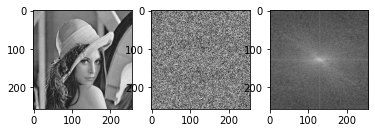

In [20]:
#ex04) 고속 푸리에 작업한 결과를 차트로 보자.
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("c:\\opencv_test\\Lenna.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#고속 푸리에 변환(2차원)
fimg = np.fft.fft2(gray)

#4면을 하나의 원형으로 만들고 가장 가운데 최저 주파수 shift
fimg = np.fft.fftshift(fimg)

#파워 스팩트럼으로 확인 : 최저주파수는 흰색으로 나머지는 검정 -> 계수값에 로그함수적용
mag = 20*np.log(np.abs(fimg))

fimg = fimg.real.astype("uint8")

#입력 영상, 그래프
plt.subplot(131)
plt.imshow(gray,cmap='gray')

plt.subplot(132)
plt.imshow(fimg,cmap='gray')

plt.subplot(133)
plt.imshow(mag,cmap='gray')

[ 1.03784209e-02+0.00000000e+00j  2.08625516e-02+1.85876403e-03j
  2.11876031e-02+3.78730767e-03j  2.17572985e-02+5.86442431e-03j
  2.26195057e-02+8.18949566e-03j  2.38556169e-02+1.09005157e-02j
  2.56024596e-02+1.42062515e-02j  2.80978478e-02+1.84503338e-02j
  3.17838516e-02+2.42543893e-02j  3.75737933e-02+3.28862484e-02j
  4.76920063e-02+4.74163045e-02j  6.93134824e-02+7.77274558e-02j
  1.45501987e-01+1.83098069e-01j -5.41998546e-01-7.62699499e-01j
 -8.39299891e-02-1.31792441e-01j -4.24153224e-02-7.42547925e-02j
 -2.69253281e-02-5.25659366e-02j -1.88643430e-02-4.11283170e-02j
 -1.39417122e-02-3.40339027e-02j -1.06354040e-02-2.91856582e-02j
 -8.26929368e-03-2.56511035e-02j -6.49732120e-03-2.29522800e-02j
 -5.12407548e-03-2.08187734e-02j -4.03092172e-03-1.90860098e-02j
 -3.14170715e-03-1.76480315e-02j -2.40533549e-03-1.64334940e-02j
 -1.78626407e-03-1.53925707e-02j -1.25901789e-03-1.44893882e-02j
 -8.04870269e-04-1.36974467e-02j -4.09753902e-04-1.29967347e-02j
 -6.29012529e-05-1.237184

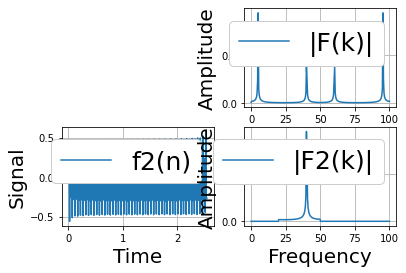

In [23]:
#ex05) 고속 푸리에 작업한 결과를 이미지로 비교 해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

N = 256 # 임의의 샘플
dt = 0.01# 샘플의 간격
fq1, fq2 = 5, 40 # 주파수
fc = 20 # 컷오프 주파수

t = np.arange(0, N * dt, dt) # 시간축
freq = np.linspace(0, 1.0 / dt, N) # 주파수 축

# 1단계 : 신호 (대상 주파수 5사인 + 주파수 40 정현파) 를 생성한다.
f = np.sin(2 * np.pi * fq1 * t) + 0.5 * np.sin(2 * np.pi * fq2 * t)

# 2단계 : 고속 푸리에 변환해서 시간 신호를 주파수 신호로 변경한다.
F = np.fft.fft(f)

# 2-1 단계 정규화 + 교류 성분 2배
F = F / (N/2)
F[0] = F[0] / 2

print(F, type(F))

# 2-2 배열을 복사
F2 = F.copy()

# 3단계 : 컷오프 주파수 fc미만의 대역과 오른쪽 절반의 대역 주파수 신호를 0으로 대입
F2[(freq < fc)] = 0
F2[(freq > 1 / (dt * 2))] = 0

# 4단계 : 역 고속 푸리에로 변환해서 주파수 신호를 시간 신호로 변환한다.
f2 = np.fft.ifft(F2)
f2 = np.real(f2*N)

# 5단계 : 그래프로 확인
plt.plot(t, f, label='f(n)')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)
plt.subplot(222)
plt.plot(freq, np.abs(F), label='|F(k)|')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)
plt.subplot(223)
plt.plot(t, f2, label='f2(n)')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)
plt.subplot(224)
plt.plot(freq, np.abs(F2), label='|F2(k)|')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=25)
leg.get_frame().set_alpha(1)
plt.show()